# Preset model evaluation

We evaluate and display metrics of previously trained models here in addition to dataset statistics and other observations.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import Dataset, renameH, process_ann_results
import utils as u
from sklearn import inspection, compose, base, model_selection, metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
idx = pd.IndexSlice

In [3]:
# Make matplotlib font non-italic and times new roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Times New Roman'

# Read presets

In [4]:
htp = Dataset.from_pickle("../output/htp.pkl")
dp = Dataset.from_pickle("../output/dp.pkl")
extra_htp = Dataset.from_pickle("../output/extra_htp.pkl")
extra_dp = Dataset.from_pickle("../output/extra_dp.pkl")


# Pair plots

In [5]:
htp.getSubset("Input Calculated").displayPairs(target_var='Heat transfer coefficient', row_len=5)

c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:259: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_obj = self.__class__(self.data.drop(droplevel1, axis=1), self.X.drop(droplevel1, axis=1), self.y)
c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:261: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_names = new_names.drop(droplevel1)
d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:259: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_obj = self.__class__(self.data.drop(droplevel1, axis=1), self.X.drop(droplevel1, axis=1), self.y)
c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:261: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_names = new_names.drop(droplevel1)
d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


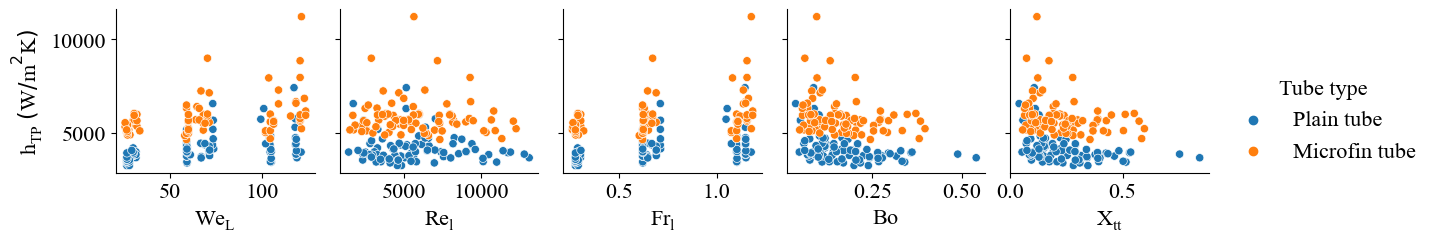

In [6]:
htp.getSubset("Input Raw").displayPairs(target_var='Heat transfer coefficient', row_len=5)

c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:259: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_obj = self.__class__(self.data.drop(droplevel1, axis=1), self.X.drop(droplevel1, axis=1), self.y)
c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:261: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_names = new_names.drop(droplevel1)
d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


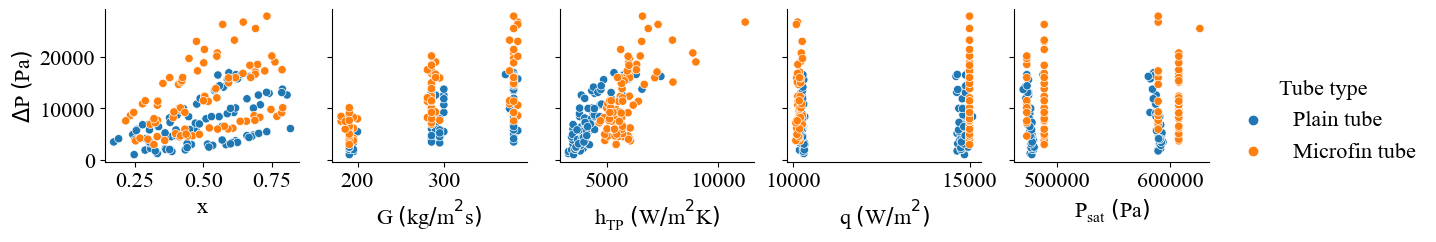

In [7]:
dp.getSubset("Input Calculated").displayPairs(target_var='Pressure drop', row_len=5)

c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:259: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_obj = self.__class__(self.data.drop(droplevel1, axis=1), self.X.drop(droplevel1, axis=1), self.y)
c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:261: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_names = new_names.drop(droplevel1)
d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


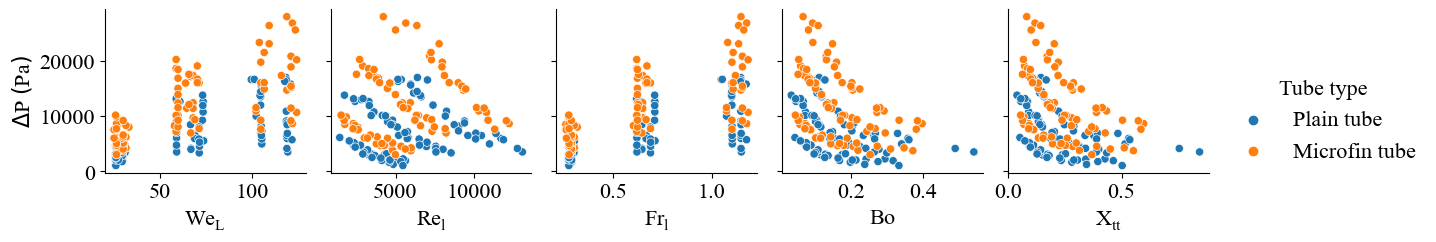

In [8]:
dp.getSubset("Input Raw").displayPairs(target_var='Pressure drop', row_len=5)

# Histograms

d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


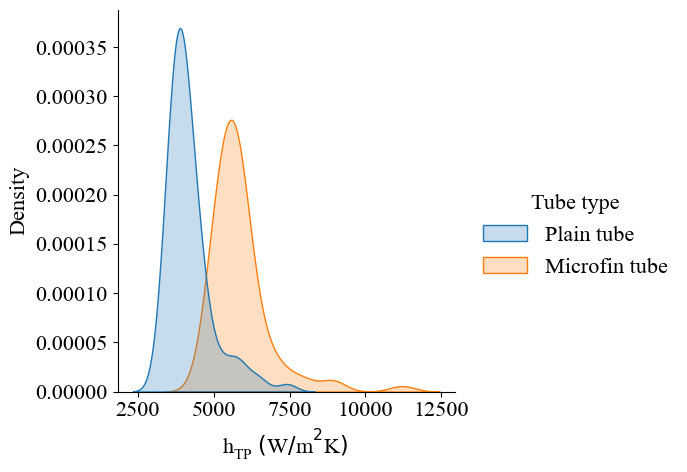

In [9]:
htp.displayHistogram('Heat transfer coefficient')

d:\conda_envs\ann\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


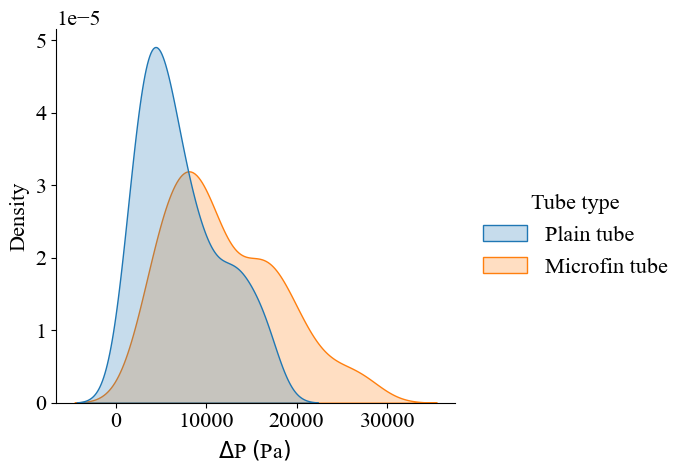

In [10]:
dp.displayHistogram('Pressure drop')

# Data Shapes

In [11]:
# dp.symbolized

In [12]:
htp.displayEDA(stylized=False).reset_index(drop=True).set_index("Variable").rename(u.NAME_KEYS).round(4)

c:\Users\berk_\OneDrive\JWorkspace\cihan\ml_calismasi\notebook\utils.py:299: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = self.data.groupby('dataset').agg(['mean']).T \


dataset             Microfin tube   Plain tube  Deviation
Variable                                                 
$G\ (kg/m^2s)$           282.6790     287.5162     0.0168
$P_{sat}\ (Pa)$       546880.0000  533260.9760     0.0255
$q\ (W/m^2)$           12442.8455   12606.3715     0.0130
$x$                        0.5053       0.4948     0.0212
$\Delta P\ (Pa)$       11966.4471    7230.3531     0.6550
$Re_{l}$                5715.9920    5786.6250     0.0122
$X_{tt}$                   0.2291       0.2332     0.0178
$Fr_{l}$                   0.6696       0.6874     0.0258
$We_{L}$                  67.1376      68.2394     0.0161
$Bo$                       0.1653       0.1674     0.0123
$h_{TP}\ (W/m^2K)$      5855.2565    4170.9653     0.4038

In [13]:
htp.displayStatsByCat(stylized=False).T.rename(u.NAME_KEYS).round(4)

Category            Microfin tube h_0  Microfin tube h_1  Microfin tube h_2  \
$G\ (kg/m^2s)$               286.8724           381.4678           190.1870   
$P_{sat}\ (Pa)$           542119.6154        544539.5238        553660.0000   
$q\ (W/m^2)$               12217.5586         12706.6337         12476.0799   
$x$                            0.5379             0.4286             0.5171   
$\Delta P\ (Pa)$           13041.5385         16913.0000          6033.2609   
$Re_{l}$                    5284.0970          8893.7049          3725.8792   
$X_{tt}$                       0.1960             0.2881             0.2260   
$Fr_{l}$                       0.6416             1.1353             0.2832   
$We_{L}$                      64.1575           113.7164            28.5613   
$Bo$                           0.1440             0.2039             0.1635   
$h_{TP}\ (W/m^2K)$          5826.7535          6343.5148          5448.6656   

Category            Plain tube h_0  Plain tube h_1  Plain tube h_2  
$G\ (kg/m^2s)$            290.1344        380.3345        191.8585  
$P_{sat}\ (Pa)$        531933.7702     518203.4127     538495.0828  
$q\ (W/m^2)$            12931.2808      12851.2493      12529.8412  
$x$                         0.5450          0.4349          0.5251  
$\Delta P\ (Pa)$         8375.9545      10362.2857       3264.0382  
$Re_{l}$                 5010.5310       8454.0280       3629.1762  
$X_{tt}$                    0.1850          0.2836          0.2065  
$Fr_{l}$                    0.6544          1.1182          0.2866  
$We_{L}$                   65.0110        109.8583         28.5652  
$Bo$                        0.1359          0.1995          0.1508  
$h_{TP}\ (W/m^2K)$       4327.0026       4432.8044       3732.1438

In [14]:
htp.displayDecompositionResults(stylized=False).rename(u.NAME_KEYS).round(4).rename_axis("Variable", axis=0)

PCA1    PCA2
Variable                        
$G\ (kg/m^2s)$    0.3714  0.3361
$P_{sat}\ (Pa)$   0.0356 -0.0280
$q\ (W/m^2)$     -0.0318  0.0447
$x$              -0.3384  0.3653
$\Delta P\ (Pa)$  0.0724  0.5194
$Re_{l}$          0.4569 -0.0598
$X_{tt}$          0.3481 -0.3646
$Fr_{l}$          0.3792  0.3258
$We_{L}$          0.3801  0.3219
$Bo$              0.3490 -0.3671

In [15]:
htp.sample_category.value_counts()*0.2

Plain tube h c:0       6.2
Microfin tube h c:0    6.0
Plain tube h c:2       5.8
Plain tube h c:1       5.8
Microfin tube h c:2    5.8
Microfin tube h c:1    5.2
Name: count, dtype: float64

In [16]:
htp.displayTrainTestStats().round(2).rename(u.NAME_KEYS).rename_axis('S').reset_index().assign(Var=lambda x: x['S'].map({v:k for k, v in u.NAME_KEYS.items()})).set_index('Var')

S      Train                 Test  \
                                             mean       std       mean   
Var                                                                      
Mass flux               $G\ (kg/m^2s)$     282.03     77.09     297.56   
Saturation pressure    $P_{sat}\ (Pa)$  538491.42  58687.15  545563.43   
Heat flux                 $q\ (W/m^2)$   12601.34   2349.82   12229.23   
Quality                            $x$       0.50      0.16       0.50   
Pressure drop         $\Delta P\ (Pa)$    9494.69   5798.09    9739.64   
Reynolds number               $Re_{l}$    5674.50   2657.72    6059.21   
Two-phase multiplier          $X_{tt}$       0.23      0.14       0.24   
Froude number                 $Fr_{l}$       0.66      0.34       0.74   
Weber number                  $We_{L}$      66.14     34.16      73.91   
Bond number                       $Bo$       0.16      0.09       0.17   

                               Comparison  
                           std    p-value  
Var                                        
Mass flux                75.21       0.28  
Saturation pressure   60585.98       0.87  
Heat flux              2353.62       0.72  
Quality                   0.16       0.97  
Pressure drop          6135.74       0.79  
Reynolds number        2907.33       0.54  
Two-phase multiplier      0.18       0.99  
Froude number             0.34       0.25  
Weber number             35.35       0.25  
Bond number               0.11       1.00

In [17]:
# cv = u.ArbitraryStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# htp.addModel(u.getANNRandomSearch(subselector_fn=u.getRaw), 'ANN with Raw Data')
# # htp.addModel(u.getGBMFocused(cv=cv), 'GBMFocused')
# htp.addModel(u.getLwrExtendedNeighbors(), 'LWR')

In [18]:
idx = pd.IndexSlice

In [19]:
htp.displayAllModelTestResults().style.highlight_max(
    # axis=1,
    axis=1,
    color='green',
    subset=idx[['R2', 'Pearson-R'], :]
    ).highlight_min(
    axis=1,
    color='green',
    subset=idx[['RMSE', 'MAE', 'MAPE', 'WAPE%'], :]
    )   

In [23]:
dp.displayAllModelTestResults().style.highlight_max(
    # axis=1,
    axis=1,
    color='green',
    subset=idx[['R2', 'Pearson-R'], :]
    ).highlight_min(
    axis=1,
    color='green',
    subset=idx[['RMSE', 'MAE', 'MAPE', 'WAPE%'], :]
    )   

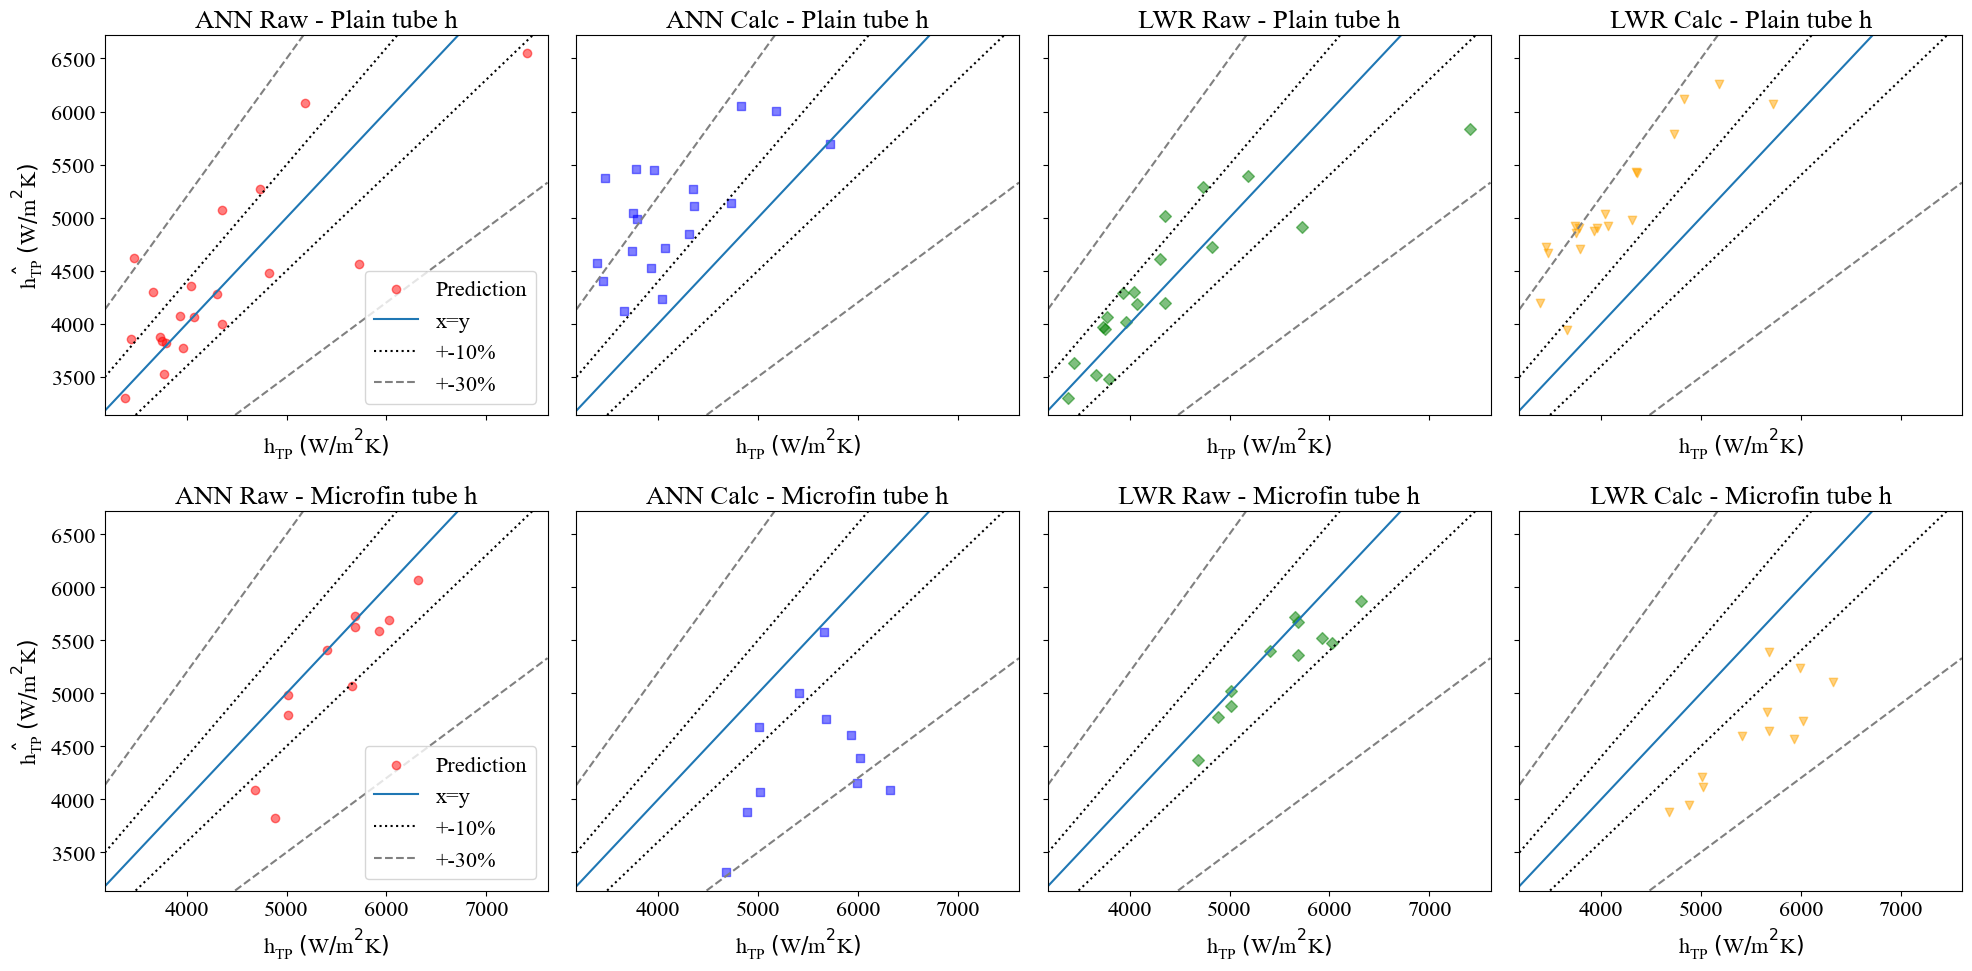

In [ ]:
htp.plot_predictions(
    model_keys=['ANN Raw', 'ANN Calc', 'LWR Raw', 'LWR Calc'], 
    figure_kwargs={'sharex': True, 'figsize': (20, 10)},
    axis_unit='W/m^2K',
    grid=False
    )
# plt.grid(False)

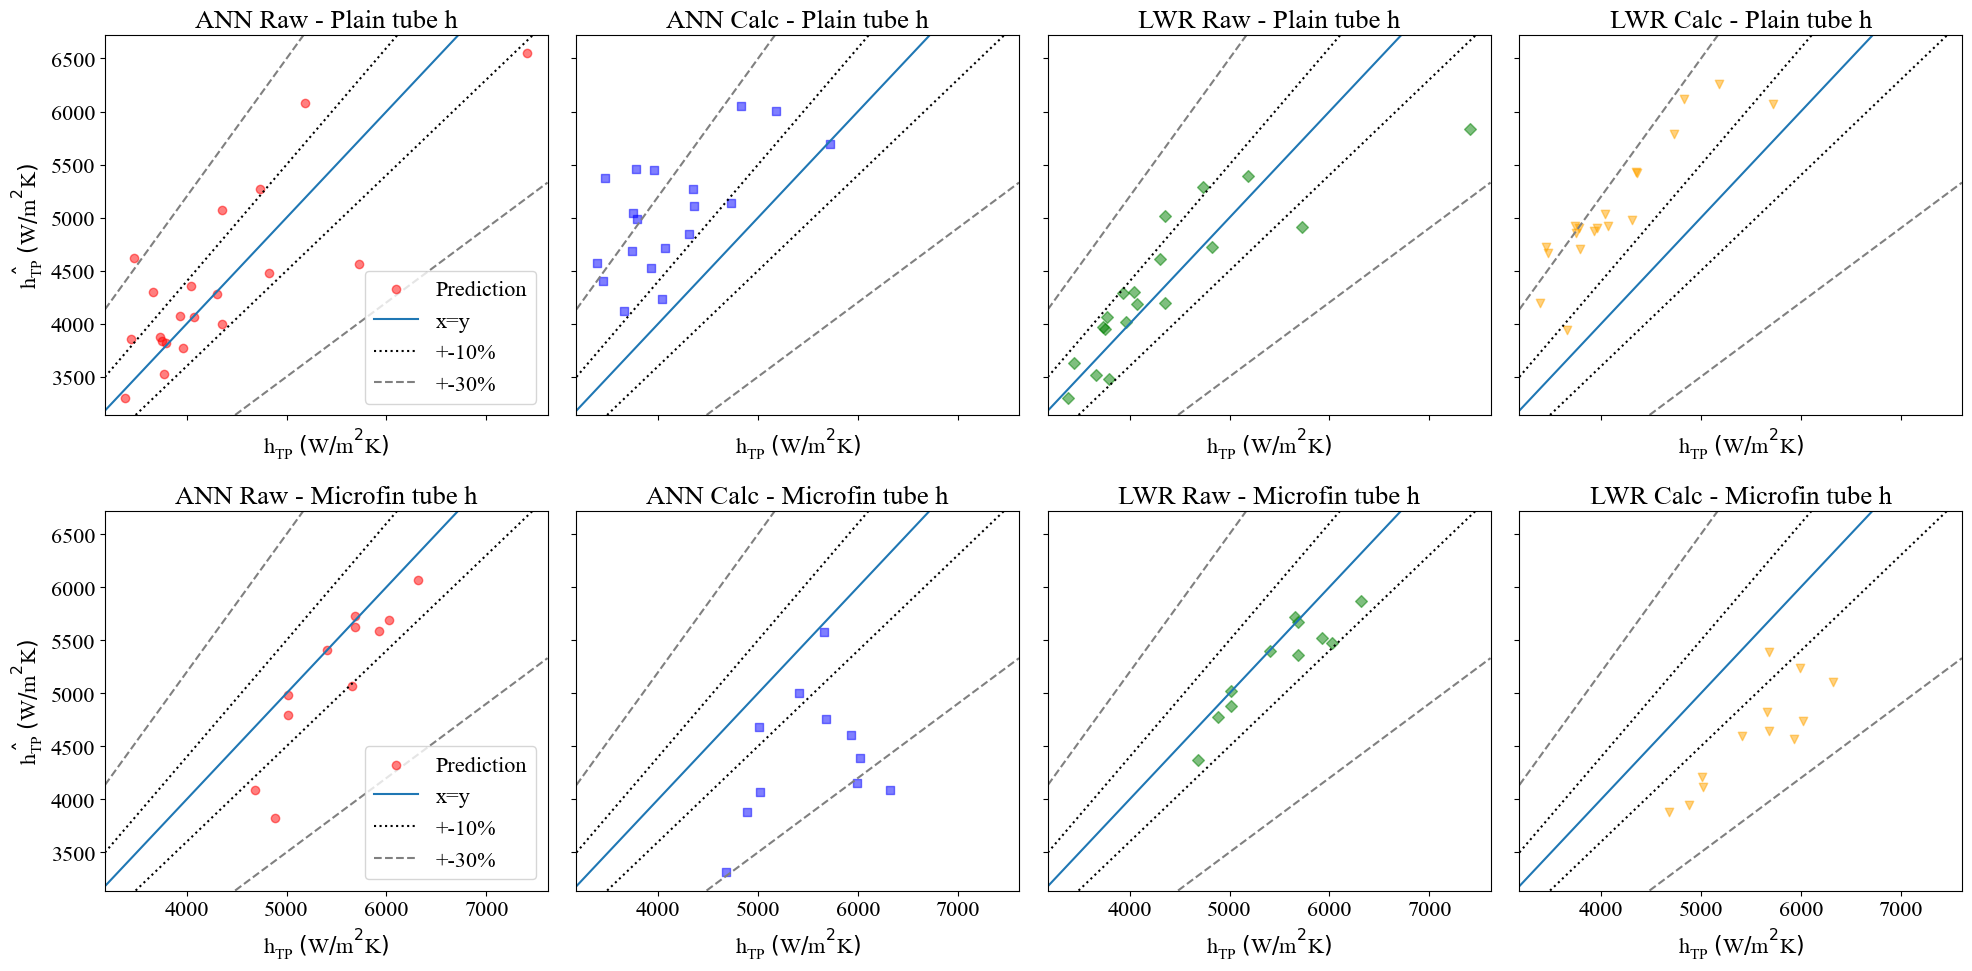

In [74]:
htp.plot_predictions(
    model_keys=['ANN Raw', 'ANN Calc', 'LWR Raw', 'LWR Calc'], 
    figure_kwargs={'sharex': True, 'figsize': (20, 10)},
    axis_unit='W/m^2K',
    grid=False
    )
# plt.grid(False)

In [80]:
htp.plot_predictions(
    model_keys=['ANN Raw', 'LWR Raw', 'GBM Raw'],
    model_keys_rename=['ANN', 'LWR', 'GBM'],
    figure_kwargs={'sharex': True, 'figsize': (18, 12)},
    axis_unit='W/m^2K',
    grid=False
    )
# plt.grid(False)

In [66]:
htp.models.keys()

dict_keys(['ANN Raw', 'ANN Calc', 'ANN Raw sCV', 'ANN Calc sCV', 'LWR Raw', 'LWR Calc', 'LWR Raw sCV', 'LWR Calc sCV', 'GBM Raw', 'GBM Calc', 'GBM Raw sCV', 'GBM Calc sCV'])

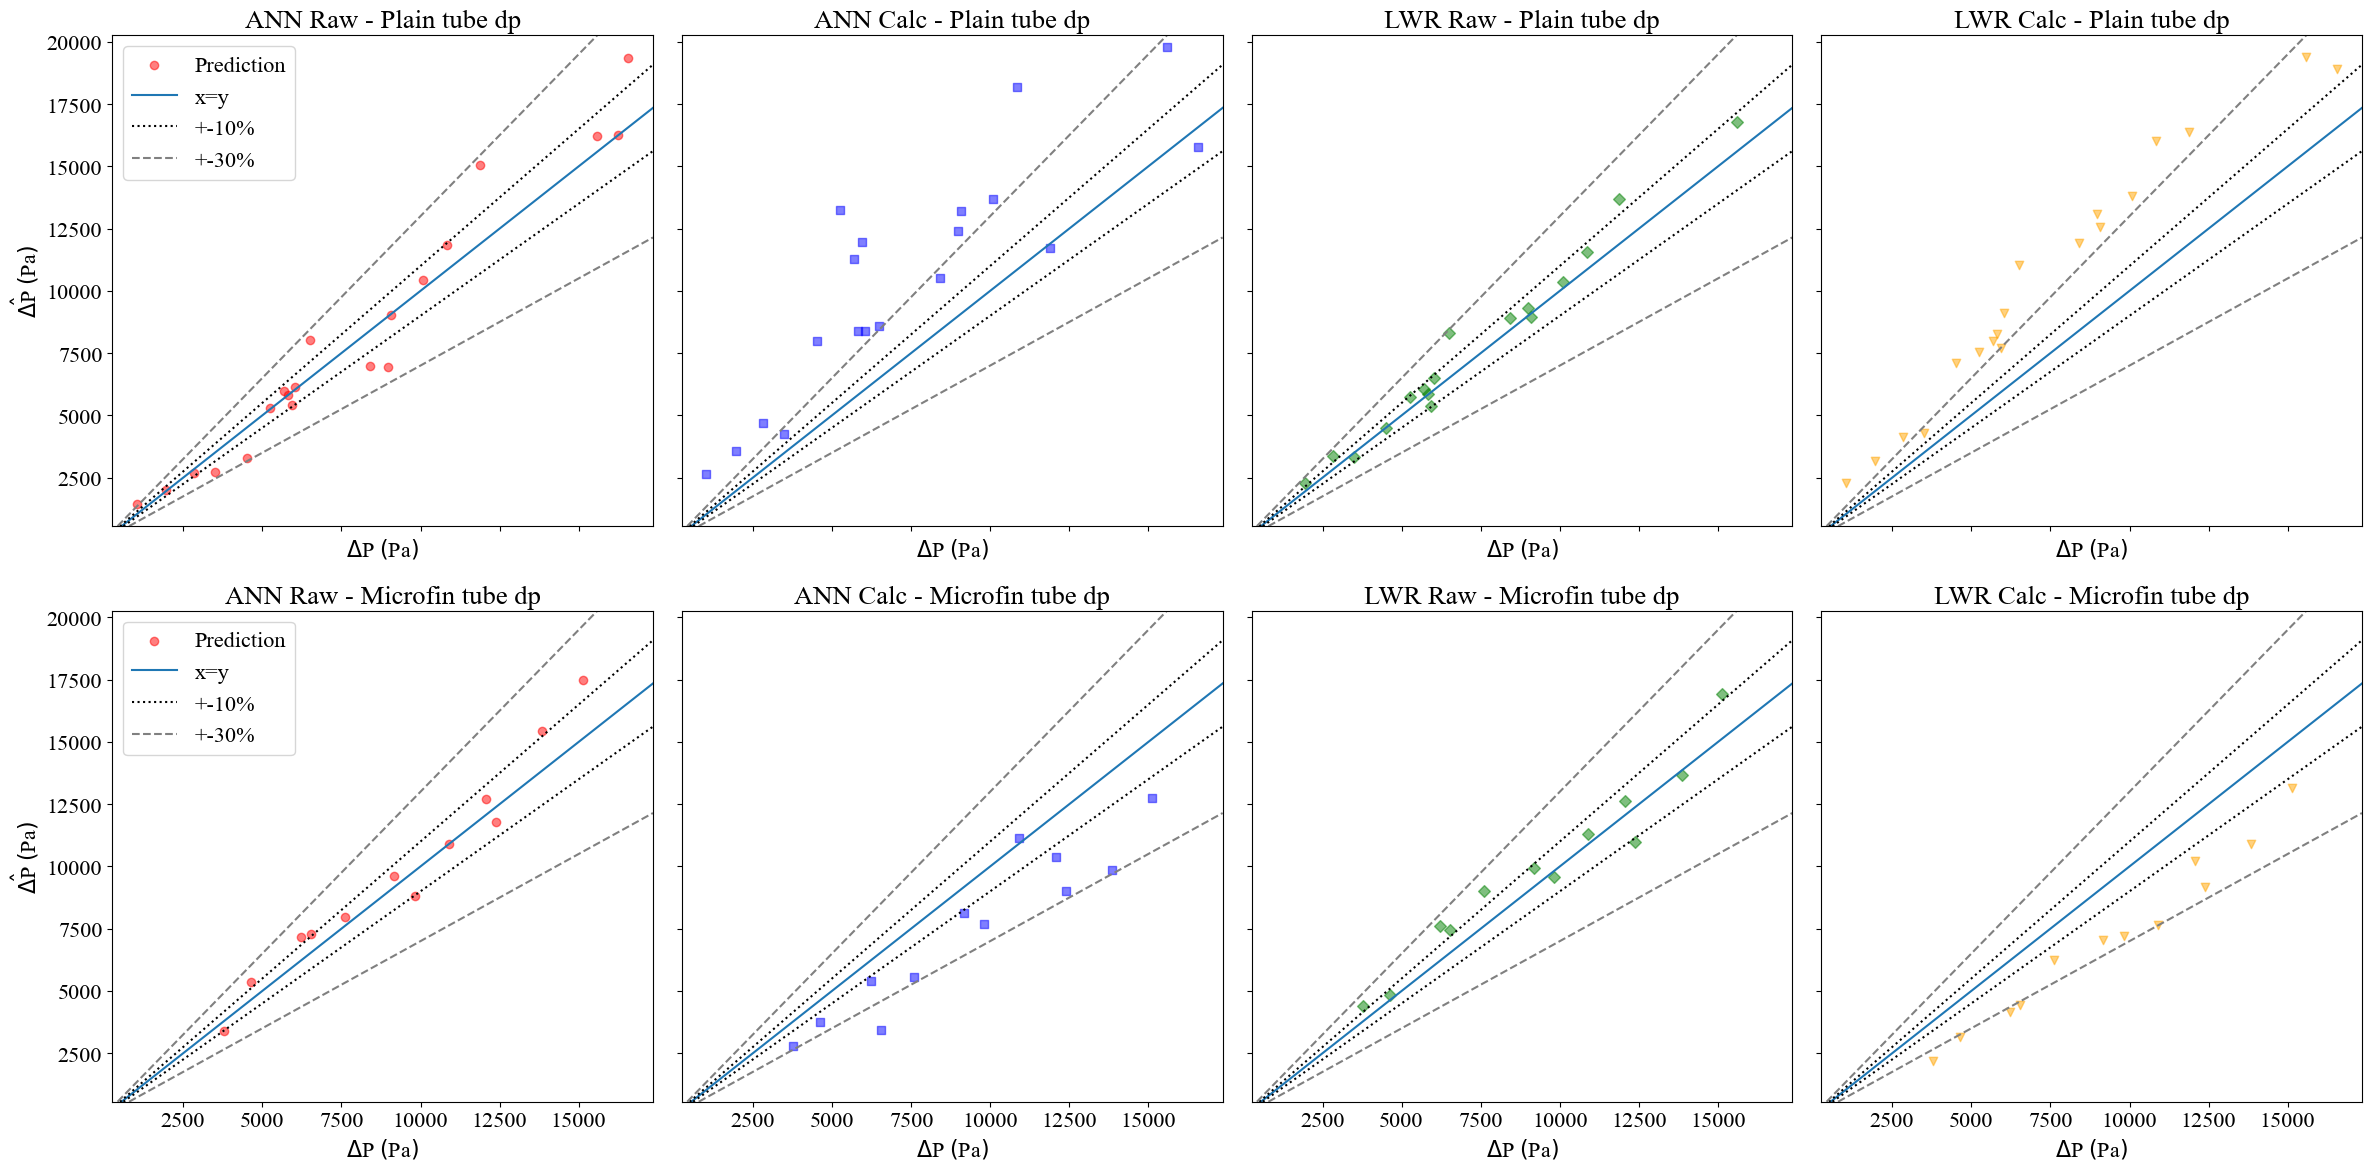

In [96]:
dp.plot_predictions(
    model_keys=['ANN Raw', 'LWR Raw', 'ANN Calc', 'LWR Calc'], 
    figure_kwargs={'sharex': True, 'figsize': (24, 12)},
    grid=False,
    target_label='\Delta P',
    axis_unit='Pa'

    )

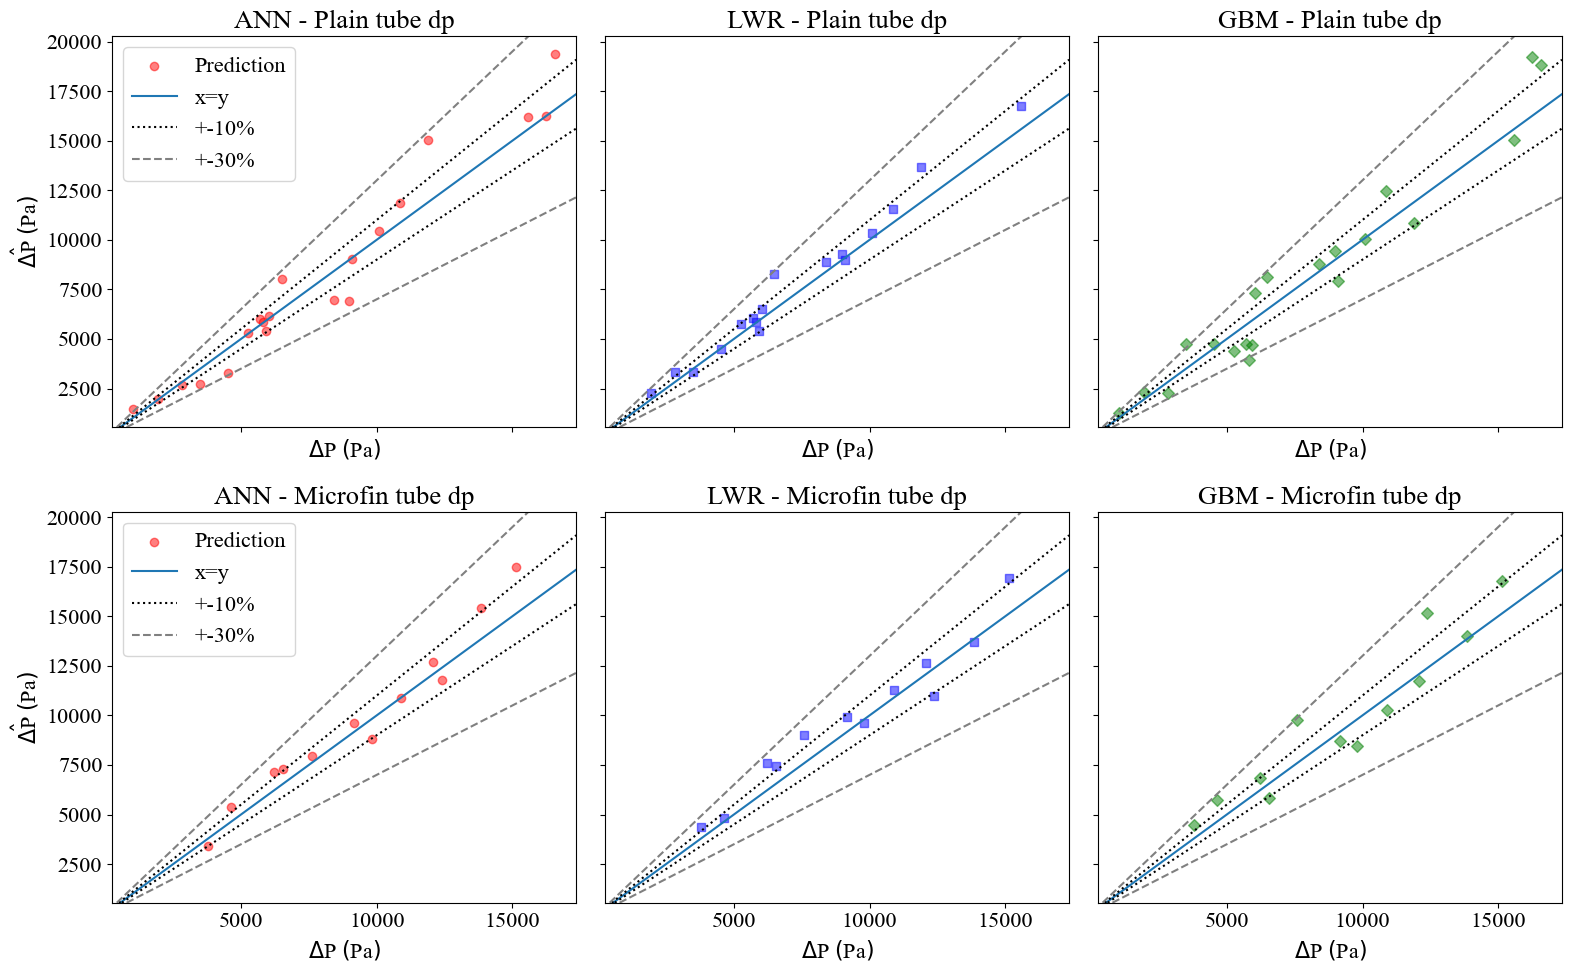

In [97]:
dp.plot_predictions(
    model_keys=['ANN Raw', 'ANN Calc', 'LWR Raw', 'LWR Calc', 'GBM Raw', 'GBM Calc'][::2],
    model_keys_rename=['ANN', 'LWR', 'GBM'], 
    figure_kwargs={'sharex': True, 'figsize': (16, 10)},
    grid=False,
    target_label='\Delta P',
    axis_unit='Pa'
    )

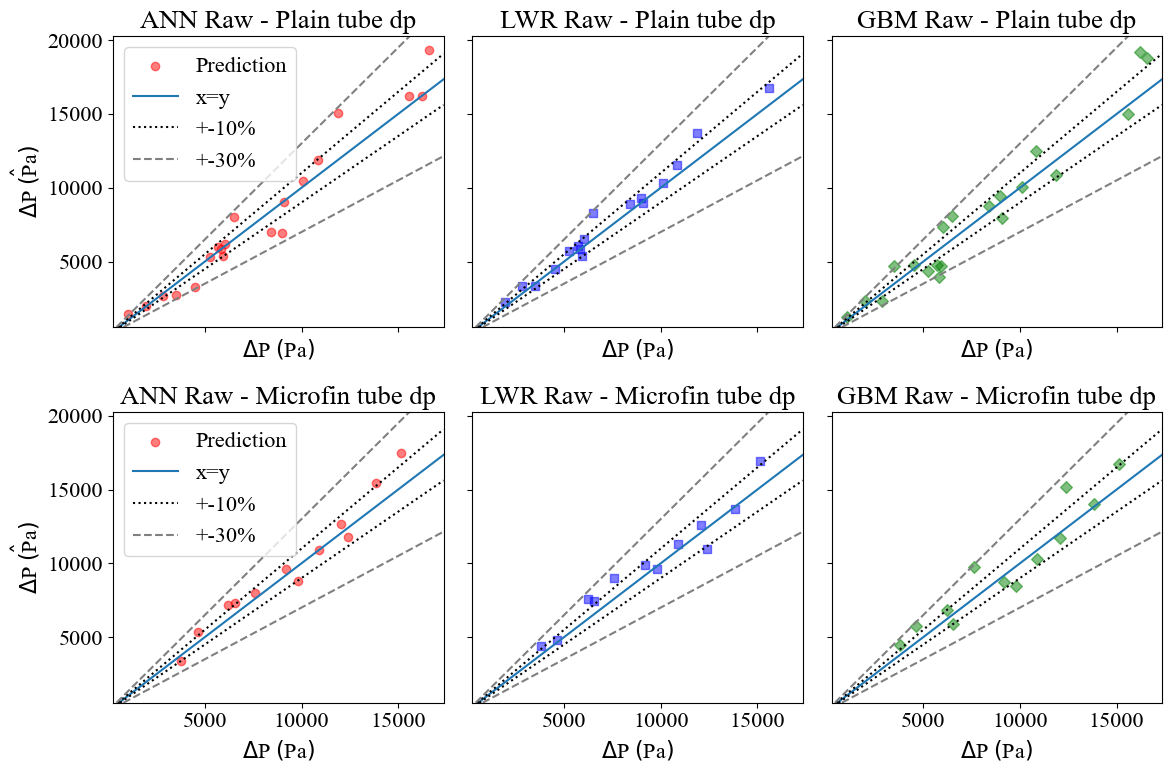

In [91]:
dp.plot_predictions(
    model_keys=[
        'ANN Raw', 'LWR Raw', 'GBM Raw'], 
    figure_kwargs={'sharex': True, 'figsize': (12, 8)}, target_label='\Delta P\ (Pa)',
    grid=False
    )

In [174]:
# extra_htp.addModel(u.getANNRandomSearch(), 'ANNRandomized')

In [26]:
pd.concat([
    extra_htp.displayAllModelTestResults()['LWR Raw'].rename("HTP Extra LWR"),
    htp.displayAllModelTestResults()['LWR Raw'].rename("HTP LWR"),
    extra_htp.displayAllModelTestResults()['ANN Raw'].rename("HTP Extra ANN"),
    htp.displayAllModelTestResults()['ANN Raw'].rename("HTP ANN"),
    extra_htp.displayAllModelTestResults()['GBM Raw'].rename("HTP Extra GBM"),
    htp.displayAllModelTestResults()['GBM Raw'].rename("HTP GBM"),
    ], axis=1)

HTP Extra LWR     HTP LWR  HTP Extra ANN     HTP ANN  \
R2              0.731619    0.835145      -0.402077    0.716894   
RMSE          765.828875  475.360741    1750.419268  622.941590   
MAE           511.283364  343.231024    1036.491070  465.045068   
MAPE            0.085098    0.065942       0.167003    0.091403   
Bias%          -0.064456   -0.007414       0.071750    0.003602   
WAPE%           0.089658    0.069214       0.181759    0.093778   
Pearson-R       0.795541    0.836384       0.652408    0.742428   

           HTP Extra GBM     HTP GBM  
R2              0.508226    0.733947  
RMSE         1036.666586  603.888607  
MAE           679.140013  473.703706  
MAPE            0.106860    0.097653  
Bias%          -0.098494   -0.002359  
WAPE%           0.119094    0.095524  
Pearson-R       0.701376    0.734780

In [27]:
pd.concat([
    extra_dp.displayAllModelTestResults()['LWR Raw'].rename("HTP Extra LWR"),
    dp.displayAllModelTestResults()['LWR Raw'].rename("HTP LWR"),
    extra_dp.displayAllModelTestResults()['ANN Raw'].rename("HTP Extra ANN"),
    dp.displayAllModelTestResults()['ANN Raw'].rename("HTP ANN"),
    extra_dp.displayAllModelTestResults()['GBM Raw'].rename("HTP Extra GBM"),
    dp.displayAllModelTestResults()['GBM Raw'].rename("HTP GBM"),
    ], axis=1)

HTP Extra LWR      HTP LWR  HTP Extra ANN      HTP ANN  \
R2              0.907050     0.888483       0.793893     0.733548   
RMSE         2367.742350  2019.497409    3525.794431  3121.636082   
MAE          1364.932260  1204.971457    1954.492045  1439.444678   
MAPE            0.139757     0.129825       0.192227     0.124897   
Bias%          -0.010218     0.038600      -0.025622    -0.041386   
WAPE%           0.128430     0.123718       0.183904     0.147792   
Pearson-R       0.912067     0.892537       0.796033     0.738590   

           HTP Extra GBM      HTP GBM  
R2              0.815935     0.881044  
RMSE         3331.937096  2085.767570  
MAE          2302.968561  1364.866820  
MAPE            0.217157     0.149162  
Bias%          -0.058071    -0.010304  
WAPE%           0.216693     0.140135  
Pearson-R       0.873095     0.883368

In [176]:
import matplotlib.pyplot as plt

(2000.0, 9000.0)

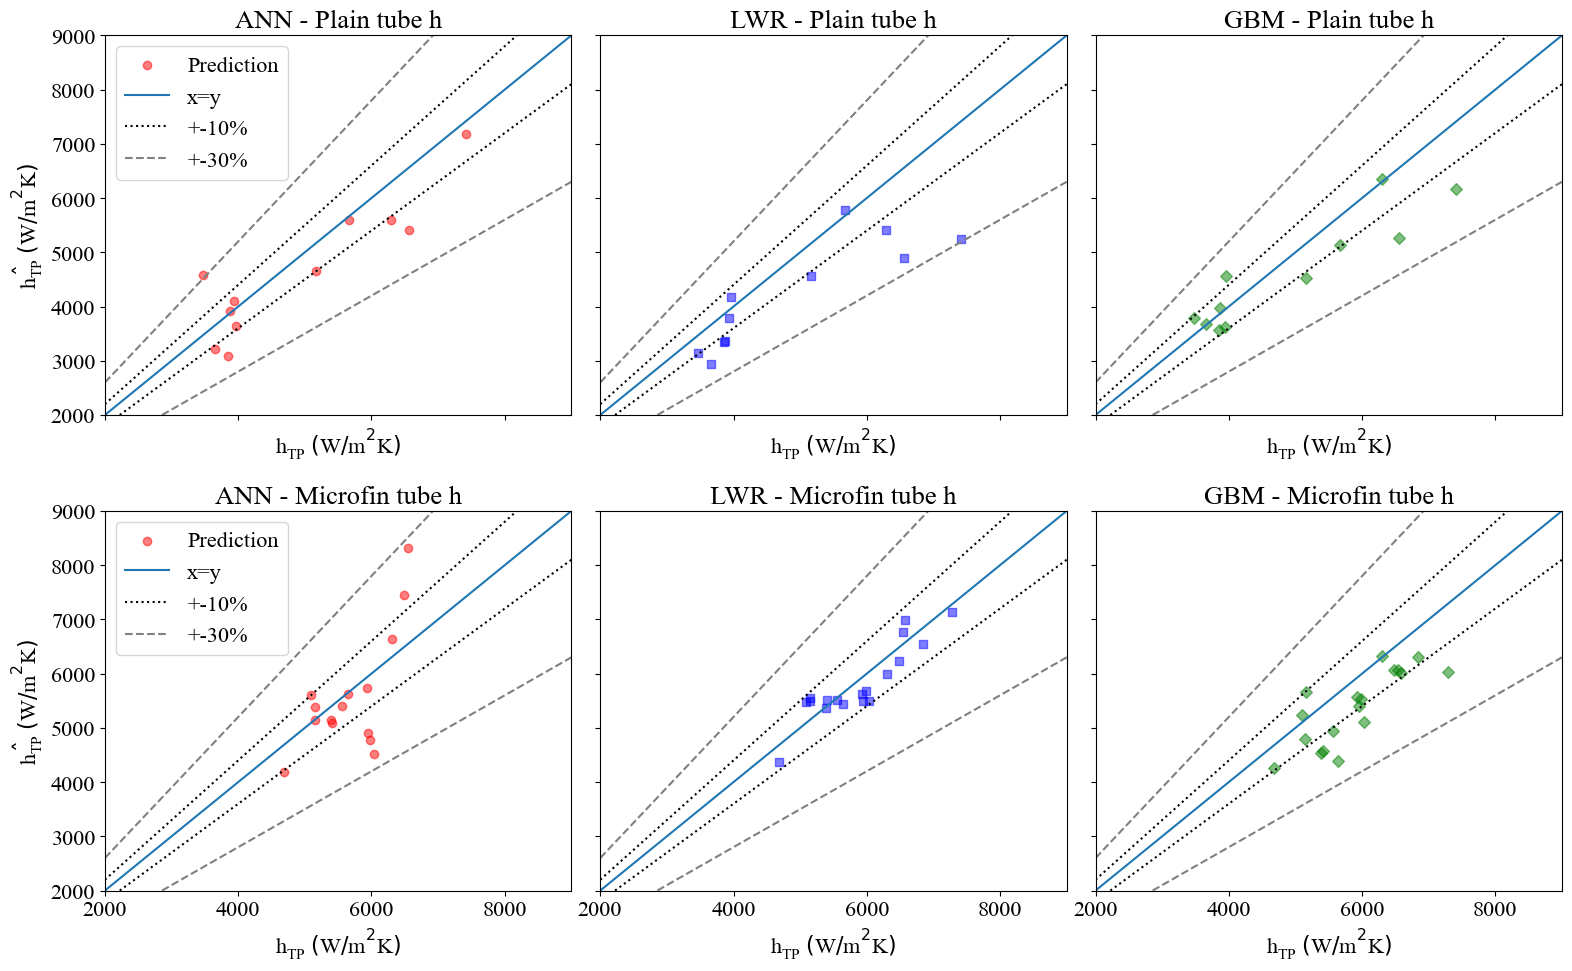

In [100]:
extra_htp.plot_predictions(model_keys=['ANN Raw', 'LWR Raw', 'GBM Raw'], figure_kwargs={'figsize': (16, 10), 'sharex': True}, grid=False,
                           axis_unit='W/m^2K', model_keys_rename=['ANN', 'LWR', 'GBM'])
plt.xlim(2000, 9000)
plt.ylim(2000, 9000)


In [28]:
dp.displayAllModelTestResults()

ANN Raw     ANN Calc  ANN Raw sCV  ANN Calc sCV      LWR Raw  \
R2            0.733548     0.666298     0.739184      0.666298     0.888483   
RMSE       3121.636082  3493.431281  3088.445292   3493.431281  2019.497409   
MAE        1439.444678  2920.869163  1385.313138   2920.869163  1204.971457   
MAPE          0.124897     0.415866     0.119887      0.415866     0.129825   
Bias%        -0.041386     0.091132    -0.047138      0.091132     0.038600   
WAPE%         0.147792     0.299895     0.142235      0.299895     0.123718   
Pearson-R     0.738590     0.694746     0.745987      0.694746     0.892537   

              LWR Calc  LWR Raw sCV  LWR Calc sCV      GBM Raw     GBM Calc  \
R2            0.738206     0.885330      0.738206     0.881044     0.745895   
RMSE       3094.231508  2047.847464   3094.231508  2085.767570  3048.450981   
MAE        2832.662766  1176.462310   2832.662766  1364.866820  2570.826649   
MAPE          0.362891     0.119216      0.362891     0.149162     0.373162   
Bias%         0.055628     0.033598      0.055628    -0.010304     0.016638   
WAPE%         0.290839     0.120791      0.290839     0.140135     0.263955   
Pearson-R     0.751230     0.888558      0.751230     0.883368     0.746698   

           GBM Raw sCV  GBM Calc sCV  
R2            0.876669      0.752295  
RMSE       2123.773496   3009.818825  
MAE        1384.790821   2542.748715  
MAPE          0.146169      0.368232  
Bias%        -0.017776      0.009972  
WAPE%         0.142181      0.261072  
Pearson-R     0.880286      0.752591

In [178]:
extra_dp.displayAllModelTestResults()

ANN Raw     ANN Calc      LWR Raw     LWR Calc      GBM Raw  \
R2            0.793893     0.653245     0.907050     0.710274     0.815935   
RMSE       3525.794431  4573.221595  2367.742350  4180.269389  3331.937096   
MAE        1954.492045  3460.070943  1364.932260  3350.049585  2302.968561   
MAPE          0.192227     0.464973     0.139757     0.418594     0.217157   
Bias%        -0.025622    -0.091347    -0.010218    -0.196667    -0.058071   
WAPE%         0.183904     0.325568     0.128430     0.315216     0.216693   
Pearson-R     0.796033     0.690617     0.912067     0.824426     0.873095   

              GBM Calc  
R2            0.733330  
RMSE       4010.494668  
MAE        2955.529504  
MAPE          0.345348  
Bias%        -0.149799  
WAPE%         0.278094  
Pearson-R     0.858252

In [179]:
htp.displayTrainTestStats()

Train                         Test  \
                               mean           std           mean   
Mass flux                282.029556     77.089806     297.558499   
Saturation pressure   538491.415562  58687.147696  545563.431469   
Heat flux              12601.337777   2349.823368   12229.228200   
Quality                    0.501118      0.158041       0.495182   
Pressure drop           9494.690594   5798.094909    9739.641073   
Reynolds number         5674.497732   2657.723149    6059.207562   
Two-phase multiplier       0.228337      0.136222       0.242467   
Froude number              0.664509      0.342018       0.735010   
Weber number              66.136773     34.155439      73.914163   
Bond number                0.164665      0.088016       0.173061   

                                   Comparison  
                               std    p-value  
Mass flux                75.209953   0.281716  
Saturation pressure   60585.975272   0.874749  
Heat flux              2353.616765   0.718047  
Quality                   0.162943   0.971364  
Pressure drop          6135.744125   0.789932  
Reynolds number        2907.325113   0.544195  
Two-phase multiplier      0.175163   0.992463  
Froude number             0.343376   0.249789  
Weber number             35.351070   0.252921  
Bond number               0.109889   0.998493

In [180]:
# scs.ks_2samp(htp.y_test, extra_htp.y_test).pvalue

In [181]:
u.compareDatasetDists(htp, extra_htp, keys=['Standard Split', 'Outlier Split'])

Standard Split  Outlier Split
Mass flux               1.205189e-03   3.971154e-03
Saturation pressure     2.461109e-03   1.722711e-03
Heat flux               8.621726e-07   1.667894e-01
Quality                 7.718811e-01   5.504668e-09
Pressure drop           6.518109e-01   4.389653e-03
Reynolds number         8.724508e-01   4.822991e-02
Two-phase multiplier    8.677080e-01   1.116201e-10
Froude number           2.484448e-02   2.118651e-02
Weber number            3.968187e-04   6.683796e-02
Bond number             8.726342e-01   1.440337e-10

In [182]:
extra_htp.displayTrainTestDistStats().round(4)

Train                     Test              \
                             mean         std         mean         std   
Mass flux                284.7645     76.4220     287.0188     79.6293   
Saturation pressure   537636.7900  58987.9201  550844.3033  58600.8614   
Heat flux              12491.3483   2347.5625   12695.1593   2385.9785   
Quality                    0.4919      0.1361       0.5386      0.2385   
Pressure drop           9104.4098   5214.7214   11653.8138   8032.1509   
Reynolds number         5828.7517   2564.2853    5388.0485   3325.3014   
Two-phase multiplier       0.2255      0.1175       0.2587      0.2354   
Froude number              0.6760      0.3406       0.6918      0.3568   
Weber number              67.3117     34.1836      69.5705     36.1729   
Bond number                0.1634      0.0759       0.1805      0.1498   

                     Comparison  
                        p-value  
Mass flux                0.0040  
Saturation pressure      0.0017  
Heat flux                0.1668  
Quality                  0.0000  
Pressure drop            0.0044  
Reynolds number          0.0482  
Two-phase multiplier     0.0000  
Froude number            0.0212  
Weber number             0.0668  
Bond number              0.0000

In [183]:
htp.displayTrainTestDistStats().round(4)

Train                     Test              \
                             mean         std         mean         std   
Mass flux                282.0296     77.0898     297.5585     75.2100   
Saturation pressure   538491.4156  58687.1477  545563.4315  60585.9753   
Heat flux              12601.3378   2349.8234   12229.2282   2353.6168   
Quality                    0.5011      0.1580       0.4952      0.1629   
Pressure drop           9494.6906   5798.0949    9739.6411   6135.7441   
Reynolds number         5674.4977   2657.7231    6059.2076   2907.3251   
Two-phase multiplier       0.2283      0.1362       0.2425      0.1752   
Froude number              0.6645      0.3420       0.7350      0.3434   
Weber number              66.1368     34.1554      73.9142     35.3511   
Bond number                0.1647      0.0880       0.1731      0.1099   

                     Comparison  
                        p-value  
Mass flux                0.0012  
Saturation pressure      0.0025  
Heat flux                0.0000  
Quality                  0.7719  
Pressure drop            0.6518  
Reynolds number          0.8725  
Two-phase multiplier     0.8677  
Froude number            0.0248  
Weber number             0.0004  
Bond number              0.8726

In [103]:
extra_dp.plot_predictions(model_keys=['ANN Raw', 'LWR Raw', 'GBM Raw'], figure_kwargs={'figsize': (16, 10), 'sharex': True},
                          model_keys_rename=['ANN', 'LWR', 'GBM'],
                          target_label='\Delta P',
                          axis_unit='Pa',
                          grid=False)
plt.xlim(-1000, 22500)
plt.ylim(-1000, 22500)


(-1000.0, 22500.0)

In [32]:
htp.data.shape

(174, 12)

In [185]:
a = extra_dp.displayAllModelTestResults()
b = dp.displayAllModelTestResults()

pd.concat([b, a], axis=1, keys=['Standard Split', 'Outlier Split']).round(4)

Standard Split                                                 \
                 ANN Raw   ANN Calc ANN Raw sCV ANN Calc sCV    LWR Raw   
R2                0.7335     0.6663      0.7392       0.6663     0.8885   
RMSE           3121.6361  3493.4313   3088.4453    3493.4313  2019.4974   
MAE            1439.4447  2920.8692   1385.3131    2920.8692  1204.9715   
MAPE              0.1249     0.4159      0.1199       0.4159     0.1298   
Bias%            -0.0414     0.0911     -0.0471       0.0911     0.0386   
WAPE%             0.1478     0.2999      0.1422       0.2999     0.1237   
Pearson-R         0.7386     0.6947      0.7460       0.6947     0.8925   

                                                                     \
            LWR Calc LWR Raw sCV LWR Calc sCV    GBM Raw   GBM Calc   
R2            0.7382      0.8853       0.7382     0.8810     0.7459   
RMSE       3094.2315   2047.8475    3094.2315  2085.7676  3048.4510   
MAE        2832.6628   1176.4623    2832.6628  1364.8668  2570.8266   
MAPE          0.3629      0.1192       0.3629     0.1492     0.3732   
Bias%         0.0556      0.0336       0.0556    -0.0103     0.0166   
WAPE%         0.2908      0.1208       0.2908     0.1401     0.2640   
Pearson-R     0.7512      0.8886       0.7512     0.8834     0.7467   

                                   Outlier Split                        \
          GBM Raw sCV GBM Calc sCV       ANN Raw   ANN Calc    LWR Raw   
R2             0.8767       0.7523        0.7939     0.6532     0.9071   
RMSE        2123.7735    3009.8188     3525.7944  4573.2216  2367.7423   
MAE         1384.7908    2542.7487     1954.4920  3460.0709  1364.9323   
MAPE           0.1462       0.3682        0.1922     0.4650     0.1398   
Bias%         -0.0178       0.0100       -0.0256    -0.0913    -0.0102   
WAPE%          0.1422       0.2611        0.1839     0.3256     0.1284   
Pearson-R      0.8803       0.7526        0.7960     0.6906     0.9121   

                                            
            LWR Calc    GBM Raw   GBM Calc  
R2            0.7103     0.8159     0.7333  
RMSE       4180.2694  3331.9371  4010.4947  
MAE        3350.0496  2302.9686  2955.5295  
MAPE          0.4186     0.2172     0.3453  
Bias%        -0.1967    -0.0581    -0.1498  
WAPE%         0.3152     0.2167     0.2781  
Pearson-R     0.8244     0.8731     0.8583

In [188]:
u.assignConfigCols(htp, 'ANN Raw').pipe(u.displayNicely)

tol
solver
learning_rate_init
hidden_layer_sizes
alpha
activation


Tol Solver Learning Rate Init    Hidden Layer Sizes   Alpha Activation  \
0   1e-05  lbfgs              0.001      (10, 10, 10, 10)     0.0       relu   
1   1e-05  lbfgs               0.01      (10, 10, 10, 10)     0.0       relu   
2   1e-05  lbfgs                0.1      (10, 10, 10, 10)     0.0       relu   
3   1e-05  lbfgs               0.01              (10, 10)     0.0       relu   
4   1e-05  lbfgs              0.001              (10, 10)     0.0       relu   
5   1e-05  lbfgs                0.1              (10, 10)     0.0       relu   
6   1e-05  lbfgs              0.001              (10, 10)  0.0001       relu   
7   1e-05  lbfgs                0.1              (10, 10)  0.0001       relu   
8   1e-05  lbfgs                0.1      (10, 10, 10, 10)  0.0001       relu   
9   1e-05  lbfgs               0.01      (10, 10, 10, 10)  0.0001       relu   
10  1e-05  lbfgs              0.001      (10, 10, 10, 10)  0.0001       relu   
11  1e-05  lbfgs               0.01              (50, 50)     0.0       relu   
12  1e-05  lbfgs               0.01      (10, 10, 10, 10)    0.01       relu   
13  1e-05  lbfgs                0.1      (10, 10, 10, 10)    0.01       relu   
14  1e-05  lbfgs              0.001      (10, 10, 10, 10)    0.01       relu   
15  1e-05  lbfgs                0.1              (10, 10)    0.01       relu   
16  1e-05  lbfgs              0.001              (10, 10)    0.01       relu   
17  1e-05  lbfgs               0.01              (10, 10)    0.01       relu   
18  1e-05  lbfgs                0.1              (20, 20)  0.0001       relu   
19  1e-05  lbfgs               0.01  (128, 64, 32, 16, 8)  0.0001       relu   
20  1e-05  lbfgs               0.01              (50, 50)  0.0001       relu   
21  1e-05  lbfgs              0.001              (50, 50)  0.0001       relu   
22  1e-05  lbfgs              0.001              (20, 20)     0.0       relu   
23  1e-05  lbfgs                0.1              (20, 20)     0.0       relu   
24  1e-05  lbfgs              0.001              (50, 50)    0.01       relu   
25  1e-05  lbfgs                0.1              (50, 50)    0.01       relu   
26  1e-05  lbfgs               0.01              (50, 50)    0.01       relu   
27  1e-05  lbfgs               0.01              (20, 20)    0.01       relu   
28  1e-05  lbfgs                0.1              (20, 20)    0.01       relu   
29  1e-05  lbfgs                0.1  (128, 64, 32, 16, 8)    0.01       relu   

     Fit Time  Score Time Test R2  Train R2   Test Rmse  Train Rmse  \
0    1.869087    0.009009  49.35%  0.999828 -844.814663  -11.045171   
1    2.320715    0.010670  49.35%  0.999828 -844.814663  -11.045171   
2    2.539288    0.011544  49.35%  0.999828 -844.814663  -11.045171   
3    1.036820    0.012000  59.79%  0.997715 -720.679746  -53.047705   
4    1.080016    0.011331  59.79%  0.997715 -720.679746  -53.047705   
5    1.179217    0.014267  59.79%  0.997715 -720.679746  -53.047705   
6    0.894984    0.015724  66.65%  0.997281 -648.696372  -62.568484   
7    1.142834    0.012461  66.65%  0.997281 -648.696372  -62.568484   
8    1.225320    0.012116  67.09%  0.999277 -691.555881  -31.841927   
9    1.291222    0.015507  67.09%  0.999277 -691.555881  -31.841927   
10   1.085847    0.014003  67.09%  0.999277 -691.555881  -31.841927   
11   0.816438    0.011999  69.45%  0.999981 -614.824757   -3.268220   
12   2.217325    0.013436  71.47%  0.999679 -641.910838  -21.040122   
13   2.377939    0.013248  71.47%  0.999679 -641.910838  -21.040122   
14   2.239864    0.011433  71.47%  0.999679 -641.910838  -21.040122   
15   1.064006    0.012333  71.49%  0.997253 -626.077102  -62.970877   
16   1.133530    0.011604  71.49%  0.997253 -626.077102  -62.970877   
17   1.133074    0.013372  71.49%  0.997253 -626.077102  -62.970877   
18   0.772718    0.010819  73.18%  0.999948 -605.170006   -6.371292   
19   2.660958    0.023612  74.62%  0.999955 -577.122316   -6.114380   
20   0.755571    0.014247  74.63% 

In [189]:
u.assignConfigCols(htp, 'LWR Raw').pipe(u.displayNicely)

gamma
n_neighbors


Gamma N Neighbors  Fit Time  Score Time                      Test R2
0     0.7           5  0.006676    0.085850  -1138408884880419848192.00%
1     1.8           5  0.014355    0.099467    -55914069245974601728.00%
2     7.0           5  0.014003    0.097533     -2516610440002691072.00%
3     5.0           5  0.015365    0.119847      -470021082389209728.00%
4     4.0           5  0.014269    0.117506      -217856444986269184.00%
..    ...         ...       ...         ...                          ...
99    1.8          40  0.016100    0.104920                       82.13%
100   1.8          50  0.014579    0.159323                       82.16%
101   1.0          40  0.014330    0.097534                       82.22%
102   1.5          50  0.013986    0.295230                       82.36%
103   1.5          40  0.021726    0.099637                       82.45%

[104 rows x 5 columns]

In [190]:
u.assignConfigCols(htp, 'GBM Raw').pipe(u.displayNicely)

learning_rate
num_leaves
reg_alpha
reg_lambda


Learning Rate Num Leaves Reg Alpha Reg Lambda  Fit Time  Score Time  \
0           0.001         32       3.0        3.0  0.450185    0.013668   
1           0.001         64       3.0        3.0  0.334237    0.012334   
2           0.001         16       3.0        3.0  0.332889    0.016335   
3           0.001         64       0.1        3.0  0.349757    0.013503   
4           0.001         32       0.1        3.0  0.511660    0.015465   
..            ...        ...       ...        ...       ...         ...   
130           0.1         16       0.1        0.1  0.319562    0.012171   
131           0.1         32       0.1        0.1  0.376244    0.012836   
132           0.1         16       3.0        0.1  0.383756    0.016836   
133           0.1         64       3.0        0.1  0.326406    0.013172   
134           0.1         32       3.0        0.1  0.335071    0.012333   

    Test R2  
0     6.75%  
1     6.75%  
2     6.75%  
3     6.75%  
4     6.75%  
..      ...  
130  54.77%  
131  54.77%  
132  54.77%  
133  54.77%  
134  54.77%  

[135 rows x 7 columns]

In [191]:
u.assignConfigCols(htp, 'GBM Raw')#.corr()['test_R2'].iloc[:4].plot.bar()

learning_rate
num_leaves
reg_alpha
reg_lambda


learning_rate num_leaves reg_alpha reg_lambda  fit_time  score_time  \
0           0.001         32       3.0        3.0  0.450185    0.013668   
1           0.001         64       3.0        3.0  0.334237    0.012334   
2           0.001         16       3.0        3.0  0.332889    0.016335   
3           0.001         64       0.1        3.0  0.349757    0.013503   
4           0.001         32       0.1        3.0  0.511660    0.015465   
..            ...        ...       ...        ...       ...         ...   
130           0.1         16       0.1        0.1  0.319562    0.012171   
131           0.1         32       0.1        0.1  0.376244    0.012836   
132           0.1         16       3.0        0.1  0.383756    0.016836   
133           0.1         64       3.0        0.1  0.326406    0.013172   
134           0.1         32       3.0        0.1  0.335071    0.012333   

      test_R2    test_RMSE    test_MAE  test_MAPE  test_Bias%  test_WAPE%  \
0    0.067476 -1171.008934 -917.316409  -0.189658   -0.000768   -0.183256   
1    0.067476 -1171.008934 -917.316409  -0.189658   -0.000768   -0.183256   
2    0.067476 -1171.008934 -917.316409  -0.189658   -0.000768   -0.183256   
3    0.067485 -1171.003615 -917.311682  -0.189657   -0.000768   -0.183255   
4    0.067485 -1171.003615 -917.311682  -0.189657   -0.000768   -0.183255   
..        ...          ...         ...        ...         ...         ...   
130  0.547677  -810.651156 -567.171572  -0.109176    0.010107   -0.113346   
131  0.547677  -810.651156 -567.171572  -0.109176    0.010107   -0.113346   
132  0.547711  -810.621963 -567.140860  -0.109169    0.010106   -0.113339   
133  0.547711  -810.621963 -567.140860  -0.109169    0.010106   -0.113339   
134  0.547711  -810.621963 -567.140860  -0.109169    0.010106   -0.113339   

     test_Pearson-R  
0          0.447509  
1          0.447509  
2          0.447509  
3          0.447509  
4          0.447509  
..              ...  
130        0.595817  
131        0.595817  
132        0.595839  
133        0.595839  
134        0.595839  

[135 rows x 13 columns]

In [192]:
htp.displayAllModelTestResults()

ANN Raw     ANN Calc  ANN Raw sCV  ANN Calc sCV     LWR Raw  \
R2           0.716894    -6.995149     0.446381     -3.922572    0.835145   
RMSE       622.941590  3310.442706   871.120663   2597.579329  475.360741   
MAE        465.045068  1838.083896   485.181988   1621.433162  343.231024   
MAPE         0.091403     0.333172     0.090030      0.303927    0.065942   
Bias%        0.003602     0.202526     0.032319      0.151423   -0.007414   
WAPE%        0.093778     0.370655     0.097838      0.326967    0.069214   
Pearson-R    0.742428     0.264327     0.681022      0.279745    0.836384   

              LWR Calc  LWR Raw sCV  LWR Calc sCV     GBM Raw     GBM Calc  \
R2            0.201190     0.828134      0.201190    0.733947     0.220001   
RMSE       1046.392288   485.364544   1046.392288  603.888607  1033.998314   
MAE         970.127554   355.453599    970.127554  473.703706   915.505226   
MAPE          0.204699     0.068499      0.204699    0.097653     0.195959   
Bias%         0.040216    -0.008451      0.040216   -0.002359     0.024444   
WAPE%         0.195629     0.071678      0.195629    0.095524     0.184615   
Pearson-R     0.306089     0.829604      0.306089    0.734780     0.267735   

           GBM Raw sCV  GBM Calc sCV  
R2            0.724373      0.302517  
RMSE        614.658126    977.776778  
MAE         482.064929    885.311483  
MAPE          0.100012      0.186474  
Bias%         0.005068      0.030151  
WAPE%         0.097210      0.178526  
Pearson-R     0.725579      0.360393

In [193]:
dp.displayAllModelTestResults()

ANN Raw     ANN Calc  ANN Raw sCV  ANN Calc sCV      LWR Raw  \
R2            0.733548     0.666298     0.739184      0.666298     0.888483   
RMSE       3121.636082  3493.431281  3088.445292   3493.431281  2019.497409   
MAE        1439.444678  2920.869163  1385.313138   2920.869163  1204.971457   
MAPE          0.124897     0.415866     0.119887      0.415866     0.129825   
Bias%        -0.041386     0.091132    -0.047138      0.091132     0.038600   
WAPE%         0.147792     0.299895     0.142235      0.299895     0.123718   
Pearson-R     0.738590     0.694746     0.745987      0.694746     0.892537   

              LWR Calc  LWR Raw sCV  LWR Calc sCV      GBM Raw     GBM Calc  \
R2            0.738206     0.885330      0.738206     0.881044     0.745895   
RMSE       3094.231508  2047.847464   3094.231508  2085.767570  3048.450981   
MAE        2832.662766  1176.462310   2832.662766  1364.866820  2570.826649   
MAPE          0.362891     0.119216      0.362891     0.149162     0.373162   
Bias%         0.055628     0.033598      0.055628    -0.010304     0.016638   
WAPE%         0.290839     0.120791      0.290839     0.140135     0.263955   
Pearson-R     0.751230     0.888558      0.751230     0.883368     0.746698   

           GBM Raw sCV  GBM Calc sCV  
R2            0.876669      0.752295  
RMSE       2123.773496   3009.818825  
MAE        1384.790821   2542.748715  
MAPE          0.146169      0.368232  
Bias%        -0.017776      0.009972  
WAPE%         0.142181      0.261072  
Pearson-R     0.880286      0.752591

In [194]:
htp.X_train.describe().loc[['mean', 'std', 'count']].T

mean           std  count
                 0                                          
Input Raw        Input 1     282.029556     77.089806  139.0
                 Input 2  538491.415562  58687.147696  139.0
                 Input 3   12601.337777   2349.823368  139.0
                 Input 4       0.501118      0.158041  139.0
                 Input 5    9494.690594   5798.094909  139.0
Input Calculated Input 1    5674.497732   2657.723149  138.0
                 Input 2       0.228337      0.136222  139.0
                 Input 3       0.664509      0.342018  139.0
                 Input 4      66.136773     34.155439  139.0
                 Input 5       0.164665      0.088016  139.0

In [229]:
htp.displayAllModelTestResults()[['ANN Raw', 'LWR Raw', 'GBM Raw']]

ANN Raw     LWR Raw     GBM Raw
R2           0.716894    0.835145    0.733947
RMSE       622.941590  475.360741  603.888607
MAE        465.045068  343.231024  473.703706
MAPE         0.091403    0.065942    0.097653
Bias%        0.003602   -0.007414   -0.002359
WAPE%        0.093778    0.069214    0.095524
Pearson-R    0.742428    0.836384    0.734780

In [232]:
htp.y_test.shape

(35,)

In [231]:
htp.displayAllModelTestResultsGrp()[['ANN Raw sCV', 'LWR Raw sCV', 'GBM Raw sCV', 'ANN Raw', 'LWR Raw', 'GBM Raw']]

ANN Raw sCV                  LWR Raw sCV               \
dataset   Microfin tube h Plain tube h Microfin tube h Plain tube h   
R2              -1.283300     0.811935        0.688802     0.705027   
RMSE          1247.135169   401.845765      460.415858   503.265064   
MAE            759.385409   279.529421      346.017832   362.530423   
MAPE             0.121976     0.066070        0.056237     0.077695   
Bias%            0.038745     0.025761       -0.015085    -0.001680   
WAPE%            0.129931     0.065085        0.059204     0.084410   
Pearson-R        0.536686     0.827883        0.751562     0.709696   

              GBM Raw sCV                      ANN Raw               \
dataset   Microfin tube h Plain tube h Microfin tube h Plain tube h   
R2               0.568639     0.486652        0.264475     0.646734   
RMSE           542.066335   663.913501      707.832768   550.752188   
MAE            466.116261   494.026430      529.449475   416.741763   
MAPE             0.081326     0.114027        0.088151     0.093841   
Bias%           -0.063678     0.075230       -0.013393     0.020948   
WAPE%            0.079752     0.115027        0.090589     0.097033   
Pearson-R        0.823628     0.616594        0.657376     0.658571   

                  LWR Raw                      GBM Raw               
dataset   Microfin tube h Plain tube h Microfin tube h Plain tube h  
R2               0.691825     0.722816        0.567751     0.513927  
RMSE           458.174367   487.853356      542.624309   646.035355  
MAE            334.283581   349.941606      468.258912   477.787300  
MAPE             0.054294     0.074678        0.082369     0.109117  
Bias%           -0.012807    -0.001909       -0.067794     0.064426  
WAPE%            0.057196     0.081479        0.080119     0.111246  
Pearson-R        0.753949     0.729163        0.847442     0.611648

In [213]:
pd.DataFrame(z)['ANN Raw'].pipe(pd.json_normalize)

Microfin tube h  Plain tube h
0         0.264475      0.646734
1       707.832768    550.752188
2       529.449475    416.741763
3         0.088151      0.093841
4        -0.013393      0.020948
5         0.090589      0.097033
6         0.657376      0.658571

In [195]:
extra_htp.displayAllModelTestResults()

ANN Raw     ANN Calc     LWR Raw     LWR Calc      GBM Raw  \
R2           -0.402077    -3.257145    0.731619    -0.195385     0.508226   
RMSE       1750.419268  3050.108688  765.828875  1616.255816  1036.666586   
MAE        1036.491070  2448.524928  511.283364  1252.514195   679.140013   
MAPE          0.167003     0.467507    0.085098     0.217248     0.106860   
Bias%         0.071750     0.049878   -0.064456    -0.069653    -0.098494   
WAPE%         0.181759     0.429372    0.089658     0.219640     0.119094   
Pearson-R     0.652408     0.033692    0.795541     0.155883     0.701376   

              GBM Calc  
R2           -0.013450  
RMSE       1488.186016  
MAE        1139.328979  
MAPE          0.188627  
Bias%        -0.139047  
WAPE%         0.199792  
Pearson-R     0.467640

In [104]:
# pd.DataFrame(model_selection.cross_validate(
#     base.clone(htp.models['ANN Raw'].best_estimator_),
#     htp.X_train,
#     htp.y_train,
#     cv=u.ArbitraryStratifiedKFold(n_splits=5, shuffle=True, random_state=0),
#     groups=htp.cats,
#     scoring=u.SCORING
# )).mean()

In [105]:
# dp.plot_predictions(figure_kwargs=dict(sharex=True), model_keys=['ANN Raw', 'LWR Raw'])

pd.DataFrame(model_selection.cross_validate(
    base.clone(htp.models['LWR'].best_estimator_),
    htp.X,
    htp.y,
    cv=u.ArbitraryStratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    groups=htp.sample_category,
    scoring=u.SCORING
)).mean()

pd.DataFrame(model_selection.cross_validate(
    base.clone(htp.models['GBM'].best_estimator_),
    htp.X,
    htp.y,
    cv=u.ArbitraryStratifiedKFold(n_splits=10, shuffle=True, random_state=0),
    groups=htp.sample_category,
    scoring=u.SCORING
)).mean()

In [203]:
htp.displayCounts()

## PCA Views

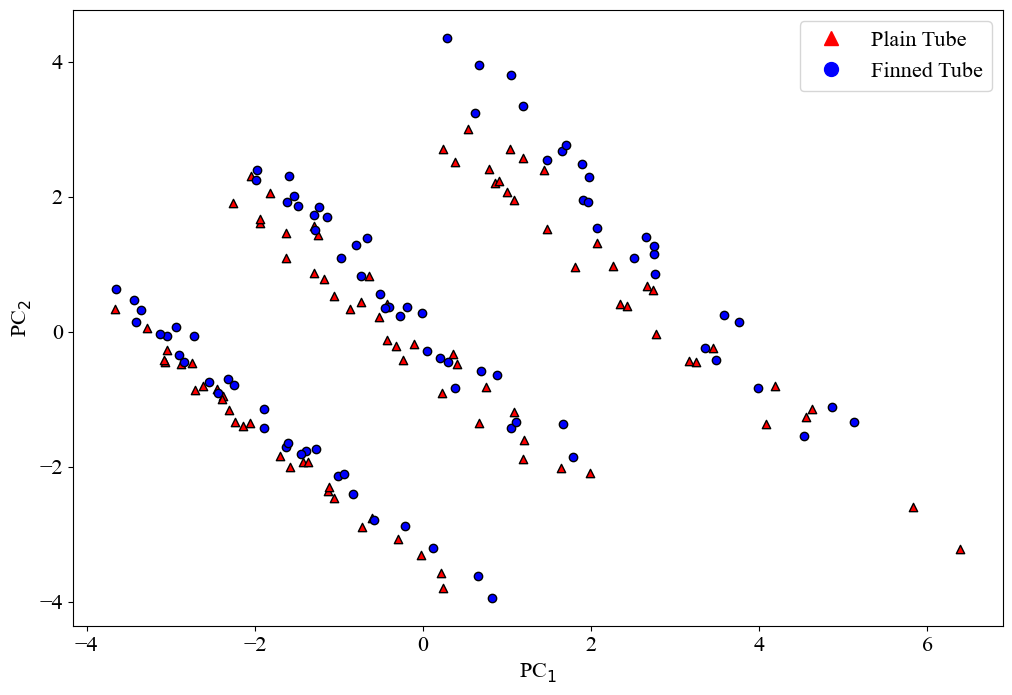

In [125]:
htp.visualizeGroupsInDecomposition()
plt.grid(False)

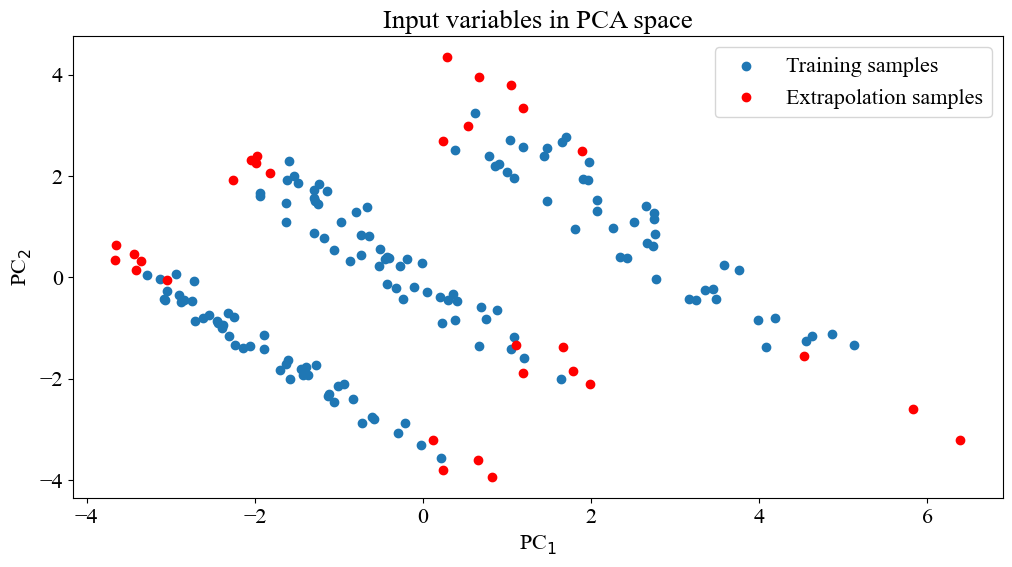

In [112]:
extra_htp.visualizeOutliers()
plt.grid(False)

# Additional analysis

In [52]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [54]:
assignConfigCols(htp, 'ANN')

activation
alpha
hidden_layer_sizes
learning_rate_init
solver
tol


activation   alpha    hidden_layer_sizes learning_rate_init solver    tol  \
0     logistic  0.0001              (50, 50)                0.1    sgd  1e-05   
1     logistic    0.01              (50, 50)                0.1    sgd  1e-05   
2     logistic  0.0001  (128, 64, 32, 16, 8)               0.01    sgd  1e-05   
3     logistic    0.01  (128, 64, 32, 16, 8)               0.01    sgd  1e-05   
4     logistic    0.01              (50, 50)                0.1   adam  1e-05   
..         ...     ...                   ...                ...    ...    ...   
211       relu    0.01              (10, 10)                0.1   adam  1e-05   
212       relu  0.0001              (10, 10)               0.01    sgd  1e-05   
213       relu    0.01              (50, 50)              0.001   adam  1e-05   
214       relu    0.01              (10, 10)                0.1    sgd  1e-05   
215       relu  0.0001  (128, 64, 32, 16, 8)                0.1    sgd  1e-05   

     fit_time  score_time   test_R2  train_R2    test_RMSE   train_RMSE  \
0    0.078532    0.014337 -0.194493 -0.184837 -1322.643048 -1331.736170   
1    0.052513    0.019673 -0.194310 -0.184668 -1322.546305 -1331.641506   
2    0.132405    0.026329 -0.103862 -0.066682 -1264.815358 -1263.657909   
3    0.122543    0.017512 -0.103856 -0.066677 -1264.812697 -1263.655460   
4    0.056853    0.015347 -0.070238 -0.044606 -1254.854057 -1251.006737   
..        ...         ...       ...       ...          ...          ...   
211  0.258577    0.013666  0.811734  0.974193  -499.626881  -190.266906   
212  1.766731    0.014506  0.811962  0.969352  -519.576950  -214.001819   
213  1.570092    0.035846  0.814607  0.995407  -507.337686   -82.115124   
214  0.484811    0.026674  0.816675  0.962266  -512.822437  -223.967561   
215  0.408649    0.014665  0.822394  0.961084  -497.980660  -239.093478   

        test_MAE    train_MAE  test_MAPE  train_MAPE  test_Bias%  train_Bias%  \
0   -1007.553177 -1006.858062  -0.185980   -0.185768    0.112738     0.113193   
1   -1007.513910 -1006.824707  -0.185983   -0.185773    0.112680     0.113135   
2    -979.200771  -980.678449  -0.214601   -0.214861   -0.063795    -0.063139   
3    -979.198602  -980.676724  -0.214601   -0.214860   -0.063793    -0.063137   
4    -977.553486  -956.936717  -0.186451   -0.180983    0.077189     0.080278   
..           ...          ...        ...         ...         ...          ...   
211  -371.981292  -141.025047  -0.073371   -0.030034    0.005551    -0.008110   
212  -370.985019  -164.895180  -0.074540   -0.034302    0.008738     0.000077   
213  -374.309751   -50.523314  -0.074872   -0.010635    0.005667     0.000036   
214  -376.199827  -171.551811  -0.074624   -0.035722    0.014149     0.007630   
215  -342.648475  -183.491860  -0.065705   -0.037881    0.004137     0.006356   

     test_WAPE%  train_WAPE%  test_Pearson-R  train_Pearson-R  
0     -0.201215    -0.201228        0.516105         0.528649  
1     -0.201207    -0.201221        0.516111         0.528657  
2     -0.195744    -0.196010        0.064618         0.058857  
3     -0.195743    -0.196010        0.064613         0.058852  
4     -0.195227    -0.191241        0.121602         0.187268  
..          ...          ...             ...              ...  
211   -0.074398    -0.028230        0.835734         0.979341  
212   -0.074170    -0.032936        0.841196         0.969398  
213   -0.074834    -0.010094        0.830100         0.995425  
214   -0.075205    -0.034247        0.838934         0.970079  
215   -0.068533    -0.036660        0.839418         0.963359  

[216 rows x 22 columns]

In [106]:
_ = assignConfigCols(dp, 'ANN').rename_axis("index").pipe(displayNicely).sort_values('Test R2', ascending=True)
_

activation
alpha
hidden_layer_sizes
learning_rate_init
solver
tol


Activation   Alpha    Hidden Layer Sizes Learning Rate Init Solver  \
index                                                                      
21      logistic  0.0001              (10, 10)               0.01    sgd   
20      logistic    0.01              (10, 10)               0.01    sgd   
19      logistic  0.0001  (128, 64, 32, 16, 8)                0.1    sgd   
18      logistic    0.01  (128, 64, 32, 16, 8)                0.1    sgd   
16      logistic    0.01  (128, 64, 32, 16, 8)                0.1  lbfgs   
...          ...     ...                   ...                ...    ...   
211         relu    0.01              (50, 50)              0.001    sgd   
212         relu  0.0001              (50, 50)               0.01    sgd   
213         relu    0.01              (50, 50)               0.01    sgd   
214         relu  0.0001  (128, 64, 32, 16, 8)              0.001    sgd   
215         relu    0.01  (128, 64, 32, 16, 8)              0.001    sgd   

         Tol  Fit Time  Score Time Test R2      Train R2    Test Rmse  \
index                                                                   
21     1e-05  0.050022    0.017510  -0.87%  1.687583e-04 -5773.102787   
20     1e-05  0.062185    0.022350  -0.87%  1.665462e-04 -5773.109146   
19     1e-05  0.138560    0.036184  -1.14% -3.466099e-04 -5777.961051   
18     1e-05  0.150886    0.042849  -1.14% -3.462635e-04 -5777.960741   
16     1e-05  0.370139    0.013671  -1.18% -5.986900e-11 -5778.172546   
...      ...       ...         ...     ...           ...          ...   
211    1e-05  1.860257    0.014333  93.03%  9.679419e-01 -1498.415244   
212    1e-05  0.881993    0.016015  93.04%  9.867374e-01 -1479.790702   
213    1e-05  1.196146    0.016673  93.09%  9.864223e-01 -1475.066892   
214    1e-05  3.019716    0.014336  93.21%  9.776249e-01 -1490.075723   
215    1e-05  2.733483    0.017334  93.21%  9.775571e-01 -1489.957667   

        Train Rmse     Test Mae    Train Mae  Test Mape  Train Mape  
index                                                                
21    -5769.631302 -4882.569913 -4844.152208  -0.892725   -0.885510  
20    -5769.637704 -4882.570201 -4844.152604  -0.892724   -0.885508  
19    -5771.169585 -4822.900658 -4784.742443  -0.855549   -0.848187  
18    -5771.168585 -4822.888642 -4784.730511  -0.855542   -0.848180  
16    -5770.169678 -4802.715346 -4765.426624  -0.843868   -0.836520  
...            ...          ...          ...        ...         ...  
211   -1030.655106 -1115.212375  -747.346606  -0.130227   -0.090027  
212    -659.650912 -1053.495614  -448.358761  -0.120255   -0.053047  
213    -667.721455 -1050.747537  -454.025250  -0.119931   -0.053669  
214    -861.312296 -1101.516852  -614.094039  -0.144470   -0.081352  
215    -862.640915 -1101.256593  -615.006340  -0.144456   -0.081511  

[216 rows x 16 columns]

In [48]:
process_ann_results(htp.models_cv['GBM'])[0].reset_index().pipe(assignConfigCols)

activation
alpha
hidden_layer_sizes
learning_rate_init
solver
tol


activation   alpha    hidden_layer_sizes learning_rate_init solver    tol  \
0     logistic  0.0001              (50, 50)                0.1    sgd  1e-05   
1     logistic    0.01              (50, 50)                0.1    sgd  1e-05   
2     logistic  0.0001  (128, 64, 32, 16, 8)               0.01    sgd  1e-05   
3     logistic    0.01  (128, 64, 32, 16, 8)               0.01    sgd  1e-05   
4     logistic    0.01              (50, 50)                0.1   adam  1e-05   
..         ...     ...                   ...                ...    ...    ...   
211       relu    0.01              (10, 10)                0.1   adam  1e-05   
212       relu  0.0001              (10, 10)               0.01    sgd  1e-05   
213       relu    0.01              (50, 50)              0.001   adam  1e-05   
214       relu    0.01              (10, 10)                0.1    sgd  1e-05   
215       relu  0.0001  (128, 64, 32, 16, 8)                0.1    sgd  1e-05   

     fit_time  score_time   test_R2  train_R2    test_RMSE   train_RMSE  \
0    0.078532    0.014337 -0.194493 -0.184837 -1322.643048 -1331.736170   
1    0.052513    0.019673 -0.194310 -0.184668 -1322.546305 -1331.641506   
2    0.132405    0.026329 -0.103862 -0.066682 -1264.815358 -1263.657909   
3    0.122543    0.017512 -0.103856 -0.066677 -1264.812697 -1263.655460   
4    0.056853    0.015347 -0.070238 -0.044606 -1254.854057 -1251.006737   
..        ...         ...       ...       ...          ...          ...   
211  0.258577    0.013666  0.811734  0.974193  -499.626881  -190.266906   
212  1.766731    0.014506  0.811962  0.969352  -519.576950  -214.001819   
213  1.570092    0.035846  0.814607  0.995407  -507.337686   -82.115124   
214  0.484811    0.026674  0.816675  0.962266  -512.822437  -223.967561   
215  0.408649    0.014665  0.822394  0.961084  -497.980660  -239.093478   

        test_MAE    train_MAE  test_MAPE  train_MAPE  test_Bias%  train_Bias%  \
0   -1007.553177 -1006.858062  -0.185980   -0.185768    0.112738     0.113193   
1   -1007.513910 -1006.824707  -0.185983   -0.185773    0.112680     0.113135   
2    -979.200771  -980.678449  -0.214601   -0.214861   -0.063795    -0.063139   
3    -979.198602  -980.676724  -0.214601   -0.214860   -0.063793    -0.063137   
4    -977.553486  -956.936717  -0.186451   -0.180983    0.077189     0.080278   
..           ...          ...        ...         ...         ...          ...   
211  -371.981292  -141.025047  -0.073371   -0.030034    0.005551    -0.008110   
212  -370.985019  -164.895180  -0.074540   -0.034302    0.008738     0.000077   
213  -374.309751   -50.523314  -0.074872   -0.010635    0.005667     0.000036   
214  -376.199827  -171.551811  -0.074624   -0.035722    0.014149     0.007630   
215  -342.648475  -183.491860  -0.065705   -0.037881    0.004137     0.006356   

     test_WAPE%  train_WAPE%  test_Pearson-R  train_Pearson-R  
0     -0.201215    -0.201228        0.516105         0.528649  
1     -0.201207    -0.201221        0.516111         0.528657  
2     -0.195744    -0.196010        0.064618         0.058857  
3     -0.195743    -0.196010        0.064613         0.058852  
4     -0.195227    -0.191241        0.121602         0.187268  
..          ...          ...             ...              ...  
211   -0.074398    -0.028230        0.835734         0.979341  
212   -0.074170    -0.032936        0.841196         0.969398  
213   -0.074834    -0.010094        0.830100         0.995425  
214   -0.075205    -0.034247        0.838934         0.970079  
215   -0.068533    -0.036660        0.839418         0.963359  

[216 rows x 22 columns]

In [8]:
dp.plot_predictions(figure_kwargs=dict(figsize=(24, 16)))

In [3]:
extra_htp.displayAllModelTestResults()

ANN         LWR          GBM
R2           0.656591    0.758915     0.500685
RMSE       866.287529  725.841152  1044.584141
MAE        639.002225  534.330825   679.639973
MAPE         0.106882    0.089451     0.105882
Bias%       -0.000478   -0.061961    -0.105651
WAPE%        0.112055    0.093700     0.119181
Pearson-R    0.739996    0.818665     0.708316

In [4]:
extra_dp.displayAllModelTestResults()

ANN          LWR          GBM
R2            0.782722     0.896018     0.790065
RMSE       3620.084787  2504.318332  3558.388607
MAE        2345.396885  1475.502880  2535.730988
MAPE          0.245799     0.146356     0.257006
Bias%         0.032832    -0.039206    -0.062514
WAPE%         0.220685     0.138834     0.238594
Pearson-R     0.787135     0.912649     0.846054

In [5]:
htp.displayAllModelTestResults()

ANN         LWR         GBM
R2           0.684167    0.849524    0.699352
RMSE       657.962636  454.156983  641.951422
MAE        463.039552  350.684576  511.085597
MAPE         0.086264    0.068111    0.105206
Bias%       -0.000915   -0.005086    0.005403
WAPE%        0.093373    0.070717    0.103062
Pearson-R    0.718660    0.850604    0.700007

In [6]:
dp.displayAllModelTestResults()

ANN          LWR          GBM
R2            0.876092     0.890873     0.886883
RMSE       2128.738423  1997.743085  2033.932503
MAE        1313.888409  1179.350101  1255.277313
MAPE          0.147334     0.126541     0.149837
Bias%         0.020617     0.038111    -0.005568
WAPE%         0.134901     0.121088     0.128883
Pearson-R     0.877317     0.895021     0.891236

In [14]:
htp.plot_predictions()